# Câu 1

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

In [2]:
X, y = make_blobs(n_samples=300, n_features=2, centers=3, cluster_std=0.6)
print(X.shape, y.shape)

(300, 2) (300,)


# Cau 2:

In [3]:
color = {0: 'r', 1: 'g', 2: 'b'}

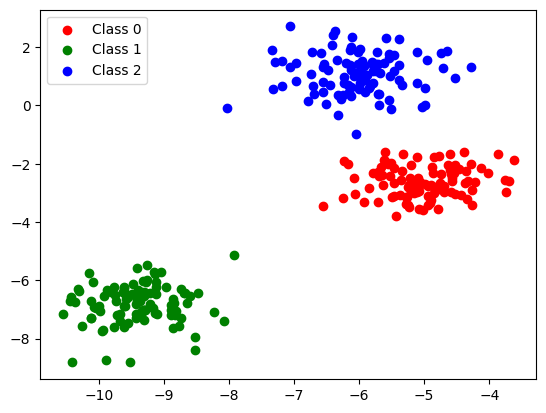

In [8]:
for value in np.unique(y):
    plt.scatter(X[y==value, 0], X[y==value, 1], c=color[value], label=f'Class {value}')
plt.legend()

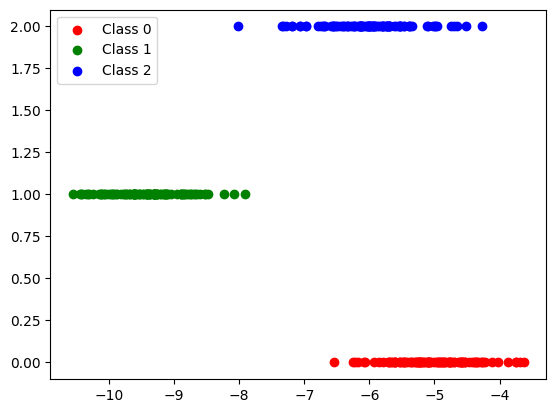

In [12]:
for value in np.unique(y):
    plt.scatter(X[y==value, 0], y[y==value], c=color[value], label=f'Class {value}')
plt.legend()

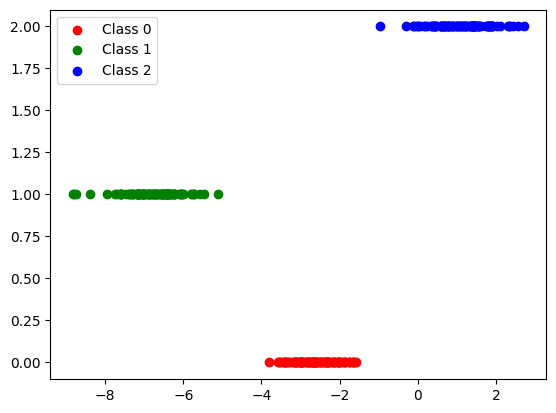

In [13]:
for value in np.unique(y):
    plt.scatter(X[y==value, 1], y[y==value], c=color[value], label=f'Class {value}')
plt.legend()

In [20]:
mean_list = []
std_list = []

for value in np.unique(y):
    mean_list.append(np.mean(X[y==value], axis=0))
    std_list.append(np.std(X[y==value], axis=0))
    
print(mean_list)
print(std_list)

[array([-5.01792871, -2.62590998]), array([-9.4100046 , -6.79562586]), array([-6.01111158,  1.09547349])]
[array([0.59494114, 0.53139451]), array([0.54185805, 0.66097365]), array([0.65390688, 0.68136969])]


# Cau 3:

In [24]:
from sklearn.preprocessing import OneHotEncoder

transform = OneHotEncoder().fit(X)
y_hot = transform.fit_transform(y.reshape(-1, 1))

print(y_hot.shape)

(300, 3)


In [25]:
from sklearn.model_selection import train_test_split

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(255, 2) (45, 2) (255,) (45,)


In [ ]:
answer = """Chia tập dữ liệu thành tập train và tập test là cần thiết để đánh giá hiệu suất của mô hình học máy.
         Tập train được sử dụng để huấn luyện mô hình, trong khi tập test được sử dụng để kiểm tra mô hình đã học được bao nhiêu từ tập train.
          Điều này giúp đảm bảo rằng mô hình có thể tổng quát hóa tốt trên dữ liệu mới mà nó chưa từng thấy trước đó, tránh hiện tượng overfitting."""

In [36]:
def softmax(X):
    exp_X = np.exp(X)
    return exp_X / np.sum(exp_X, axis=1, keepdims=True)

In [43]:
X_train_max = np.max(X_train, axis=0, keepdims=True)
X_train_min = np.min(X_train, axis=0, keepdims=True)
print(X_train_max)
print(X_train_min)

[[-3.62487937  2.71176807]]
[[-10.44491154  -8.82046167]]


In [46]:
X_train_scaled = (X_train - X_train_min) / (X_train_max - X_train_min)
X_test_scaled = (X_test - X_train_min) / (X_train_max - X_train_min)

print(X_train_scaled.shape, X_test_scaled.shape)

(255, 2) (45, 2)


# Cau 4:

In [102]:
def predict_probabilities(X, w):
    return softmax(X @ w)

def predict(X, w):
    return np.argmax(predict_probabilities(X, w), axis=1)

In [162]:
w = np.random.rand(X_train_scaled.shape[1], len(np.unique(y_train)))
print(w)
print(predict(X_test_scaled, w))

[[0.15482497 0.44535355 0.68243907]
 [0.33291351 0.23667613 0.57090668]]
[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2]


In [110]:
def cross_entropy(y_true, y_pred):
     # Chuyển đổi y_true thành one-hot encoding
    num_classes = y_pred.shape[1]
    y_true_one_hot = np.eye(num_classes)[y_true]
    
    # Đảm bảo y_pred không chứa giá trị 0 hoặc 1 để tránh log(0)
    y_pred = np.clip(y_pred, 1e-15, 1 - 1e-15)
    
    # Tính cross entropy
    loss = -np.sum(y_true_one_hot * np.log(y_pred)) / y_true.shape[0]
    return loss

In [163]:
print(cross_entropy(y_test, predict_probabilities(X_test_scaled, w)))

1.0924673051803002


In [114]:
def gradient(X, y, w):
    y_pred = predict_probabilities(X, w)
    num_classes = y_pred.shape[1]
    detal = y_pred - np.eye(num_classes)[y]
    return X.T @ detal / y.shape[0]

In [164]:
print(cross_entropy(y_train, predict_probabilities(X_train_scaled, w)))

w -= 0.5 * gradient(X_train_scaled, y_train, w)

print(cross_entropy(y_train, predict_probabilities(X_train_scaled, w)))

1.0969521406358917
1.0779318152342852


In [165]:
w = np.random.rand(X_train_scaled.shape[1], len(np.unique(y_train)))
print(w)
print(cross_entropy(y_test, predict_probabilities(X_test_scaled, w)))

for _ in range(1000):
    w -= 0.01 * gradient(X_train_scaled, y_train, w)

print(w)
print(cross_entropy(y_test, predict_probabilities(X_test_scaled, w)))

[[0.70000972 0.93259866 0.07765071]
 [0.03137578 0.46524101 0.84480118]]
1.130446919110631
[[ 1.3976395   0.18601095  0.12660863]
 [ 0.00200365 -0.15501799  1.49443232]]
0.8424442383215598


In [193]:
def train(X, y, w, epochs=1000, lr=0.01):
    losses = []
    for _ in range(epochs):
        w -= lr * gradient(X, y, w)
        losses.append(cross_entropy(y, predict_probabilities(X, w)))
    return w, losses

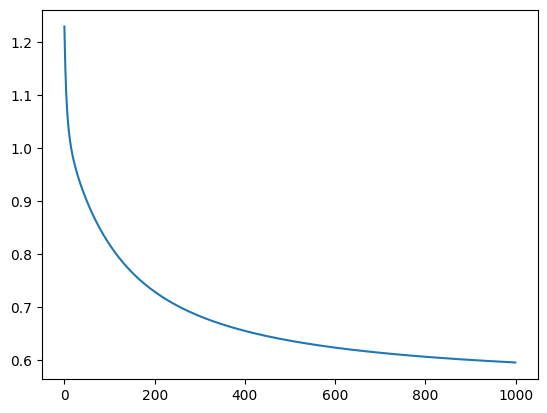

In [213]:
w = np.random.rand(X_train_scaled.shape[1], len(np.unique(y_train)))
w_trained, losses = train(X_train_scaled, y_train, w, epochs=1000, lr=0.5)

plt.plot(losses)

# Cau 5:

In [219]:
train_loss = cross_entropy(y_train, predict_probabilities(X_train_scaled, w_trained))
test_loss = cross_entropy(y_test, predict_probabilities(X_test_scaled, w_trained))
print(train_loss, test_loss)

0.594807695454175 0.4816638152016175


In [221]:
from sklearn.metrics import accuracy_score, recall_score, precision_score

y_train_pred = predict(X_train_scaled, w_trained)
y_test_pred = predict(X_test_scaled, w_trained)

# Calculate metrics for the training set
train_accuracy = accuracy_score(y_train, y_train_pred)
train_recall = recall_score(y_train, y_train_pred, average='macro', zero_division=1)
train_precision = precision_score(y_train, y_train_pred, average='macro', zero_division=1)

# Calculate metrics for the testing set
test_accuracy = accuracy_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred, average='macro', zero_division=1)
test_precision = precision_score(y_test, y_test_pred, average='macro', zero_division=1)

# Nhận xét
print("\nNhận xét:")
print("Training set:")
print(f"- Accuracy: {train_accuracy:.2f}")
print(f"- Recall: {train_recall:.2f}")
print(f"- Precision: {train_precision:.2f}")

print("\nTesting set:")
print(f"- Accuracy: {test_accuracy:.2f}")
print(f"- Recall: {test_recall:.2f}")
print(f"- Precision: {test_precision:.2f}")

if train_accuracy > test_accuracy:
    print("\nMô hình có thể đang bị overfitting, vì độ chính xác trên tập huấn luyện cao hơn so với tập kiểm tra.")
else:
    print("\nMô hình không bị overfitting, vì độ chính xác trên tập huấn luyện và tập kiểm tra tương đương.")


Nhận xét:
Training set:
- Accuracy: 0.65
- Recall: 0.66
- Precision: 0.77

Testing set:
- Accuracy: 0.73
- Recall: 0.67
- Precision: 0.82

Mô hình không bị overfitting, vì độ chính xác trên tập huấn luyện và tập kiểm tra tương đương.


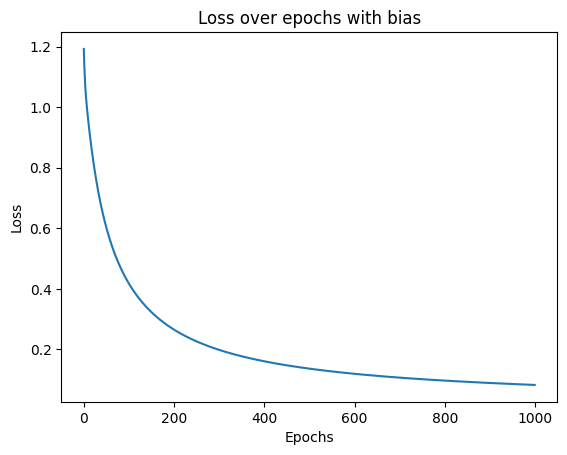

Train Loss with bias: 0.08257777898418432
Test Loss with bias: 0.0746119203246315
Train Accuracy with bias: 1.0
Train Recall with bias: 1.0
Train Precision with bias: 1.0
Test Accuracy with bias: 1.0
Test Recall with bias: 1.0
Test Precision with bias: 1.0


In [223]:
# Thêm bias vào dữ liệu
X_train_scaled_bias = np.hstack([np.ones((X_train_scaled.shape[0], 1)), X_train_scaled])
X_test_scaled_bias = np.hstack([np.ones((X_test_scaled.shape[0], 1)), X_test_scaled])

# Khởi tạo lại trọng số với bias
w_bias = np.random.rand(X_train_scaled_bias.shape[1], len(np.unique(y_train)))

# Huấn luyện lại mô hình với dữ liệu đã thêm bias
w_trained_bias, losses_bias = train(X_train_scaled_bias, y_train, w_bias, epochs=1000, lr=0.5)

# Vẽ đồ thị loss
plt.plot(losses_bias)
plt.title('Loss over epochs with bias')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

# Đánh giá mô hình
train_loss_bias = cross_entropy(y_train, predict_probabilities(X_train_scaled_bias, w_trained_bias))
test_loss_bias = cross_entropy(y_test, predict_probabilities(X_test_scaled_bias, w_trained_bias))
print(f'Train Loss with bias: {train_loss_bias}')
print(f'Test Loss with bias: {test_loss_bias}')

y_train_pred_bias = predict(X_train_scaled_bias, w_trained_bias)
y_test_pred_bias = predict(X_test_scaled_bias, w_trained_bias)

train_accuracy_bias = accuracy_score(y_train, y_train_pred_bias)
train_recall_bias = recall_score(y_train, y_train_pred_bias, average='macro', zero_division=1)
train_precision_bias = precision_score(y_train, y_train_pred_bias, average='macro', zero_division=1)

test_accuracy_bias = accuracy_score(y_test, y_test_pred_bias)
test_recall_bias = recall_score(y_test, y_test_pred_bias, average='macro', zero_division=1)
test_precision_bias = precision_score(y_test, y_test_pred_bias, average='macro', zero_division=1)

print(f'Train Accuracy with bias: {train_accuracy_bias}')
print(f'Train Recall with bias: {train_recall_bias}')
print(f'Train Precision with bias: {train_precision_bias}')
print(f'Test Accuracy with bias: {test_accuracy_bias}')
print(f'Test Recall with bias: {test_recall_bias}')
print(f'Test Precision with bias: {test_precision_bias}')

In [226]:
from sklearn.metrics import confusion_matrix

# Confusion matrix for the training set
train_confusion_matrix = confusion_matrix(y_train, y_train_pred_bias)
print("Training Confusion Matrix:")
print(train_confusion_matrix)

# Confusion matrix for the testing set
test_confusion_matrix = confusion_matrix(y_test, y_test_pred_bias)
print("Testing Confusion Matrix:")
print(test_confusion_matrix)

Training Confusion Matrix:
[[84  0  0]
 [ 0 88  0]
 [ 0  0 83]]
Testing Confusion Matrix:
[[16  0  0]
 [ 0 12  0]
 [ 0  0 17]]


In [227]:
from sklearn.neighbors import KNeighborsClassifier

# Khai báo mô hình với số hàng xóm lân cận là 1
knn_1 = KNeighborsClassifier(n_neighbors=1)

# Khai báo mô hình với số hàng xóm lân cận là 11
knn_11 = KNeighborsClassifier(n_neighbors=11)

In [228]:
knn_1.fit(X_train_scaled, y_train)
knn_11.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=11)

In [229]:
# Calculate accuracy for knn_1
train_accuracy_knn_1 = accuracy_score(y_train, knn_1.predict(X_train_scaled))
test_accuracy_knn_1 = accuracy_score(y_test, knn_1.predict(X_test_scaled))

# Calculate accuracy for knn_11
train_accuracy_knn_11 = accuracy_score(y_train, knn_11.predict(X_train_scaled))
test_accuracy_knn_11 = accuracy_score(y_test, knn_11.predict(X_test_scaled))

print(f"Train Accuracy (k=1): {train_accuracy_knn_1:.2f}")
print(f"Test Accuracy (k=1): {test_accuracy_knn_1:.2f}")
print(f"Train Accuracy (k=11): {train_accuracy_knn_11:.2f}")
print(f"Test Accuracy (k=11): {test_accuracy_knn_11:.2f}")

Train Accuracy (k=1): 1.00
Test Accuracy (k=1): 1.00
Train Accuracy (k=11): 1.00
Test Accuracy (k=11): 1.00


# Cau 6:

In [234]:
explanation = """
Phương pháp Cross Validation (CV) là một kỹ thuật được sử dụng để đánh giá hiệu suất của mô hình học máy và lựa chọn siêu tham số. 
Cross Validation chia dữ liệu thành nhiều tập con (folds) và thực hiện huấn luyện và kiểm tra mô hình trên các tập con này để đảm bảo rằng mô hình không bị overfitting hoặc underfitting.

Quy trình Cross Validation thường bao gồm các bước sau:
1. Chia dữ liệu thành k tập con (folds).
2. Huấn luyện mô hình trên k-1 tập con và kiểm tra trên tập con còn lại.
3. Lặp lại quá trình trên cho mỗi tập con.
4. Tính toán trung bình các chỉ số đánh giá (ví dụ: accuracy, precision, recall) trên tất cả các lần kiểm tra.

Phương pháp này giúp đánh giá mô hình một cách toàn diện hơn và lựa chọn các siêu tham số tối ưu.

Với mô hình KNeighborsClassifier, các siêu tham số quan trọng bao gồm:
1. n_neighbors: Số lượng láng giềng gần nhất được sử dụng để phân loại một mẫu.
2. weights: Cách tính trọng số cho các láng giềng ('uniform' hoặc 'distance').
3. algorithm: Thuật toán được sử dụng để tìm các láng giềng gần nhất ('auto', 'ball_tree', 'kd_tree', 'brute').
4. leaf_size: Kích thước của lá trong cây tìm kiếm (chỉ áp dụng khi sử dụng 'ball_tree' hoặc 'kd_tree').
5. p: Tham số sức mạnh cho khoảng cách Minkowski (p=1 tương ứng với khoảng cách Manhattan, p=2 tương ứng với khoảng cách Euclidean).

Cross Validation giúp tìm ra các giá trị tối ưu cho các siêu tham số này, từ đó cải thiện hiệu suất của mô hình.
"""
print(explanation)


Phương pháp Cross Validation (CV) là một kỹ thuật được sử dụng để đánh giá hiệu suất của mô hình học máy và lựa chọn siêu tham số. 
Cross Validation chia dữ liệu thành nhiều tập con (folds) và thực hiện huấn luyện và kiểm tra mô hình trên các tập con này để đảm bảo rằng mô hình không bị overfitting hoặc underfitting.

Quy trình Cross Validation thường bao gồm các bước sau:
1. Chia dữ liệu thành k tập con (folds).
2. Huấn luyện mô hình trên k-1 tập con và kiểm tra trên tập con còn lại.
3. Lặp lại quá trình trên cho mỗi tập con.
4. Tính toán trung bình các chỉ số đánh giá (ví dụ: accuracy, precision, recall) trên tất cả các lần kiểm tra.

Phương pháp này giúp đánh giá mô hình một cách toàn diện hơn và lựa chọn các siêu tham số tối ưu.

Với mô hình KNeighborsClassifier, các siêu tham số quan trọng bao gồm:
1. n_neighbors: Số lượng láng giềng gần nhất được sử dụng để phân loại một mẫu.
2. weights: Cách tính trọng số cho các láng giềng ('uniform' hoặc 'distance').
3. algorithm: Thuật toán 

In [230]:
from sklearn.model_selection import cross_val_score

# Tính điểm cross-validation cho knn_1
scores_knn_1 = cross_val_score(knn_1, X_train_scaled, y_train, cv=5)
print(f"Cross-validation scores for knn_1: {scores_knn_1}")
print(f"Mean cross-validation score for knn_1: {scores_knn_1.mean()}")

# Tính điểm cross-validation cho knn_11
scores_knn_11 = cross_val_score(knn_11, X_train_scaled, y_train, cv=5)
print(f"Cross-validation scores for knn_11: {scores_knn_11}")
print(f"Mean cross-validation score for knn_11: {scores_knn_11.mean()}")

Cross-validation scores for knn_1: [1. 1. 1. 1. 1.]
Mean cross-validation score for knn_1: 1.0
Cross-validation scores for knn_11: [1. 1. 1. 1. 1.]
Mean cross-validation score for knn_11: 1.0


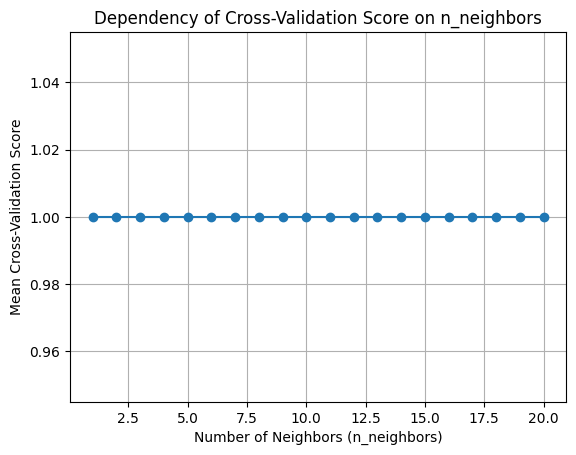

In [231]:
from sklearn.model_selection import cross_val_score

# Define the range of n_neighbors
n_neighbors_range = range(1, 21)

# Initialize a list to store the mean cross-validation scores
mean_scores = []

# Loop over the range of n_neighbors
for n_neighbors in n_neighbors_range:
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    scores = cross_val_score(knn, X_train_scaled, y_train, cv=5)
    mean_scores.append(scores.mean())

# Plot the results
plt.plot(n_neighbors_range, mean_scores, marker='o')
plt.xlabel('Number of Neighbors (n_neighbors)')
plt.ylabel('Mean Cross-Validation Score')
plt.title('Dependency of Cross-Validation Score on n_neighbors')
plt.grid(True)
plt.show()

In [232]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'metric': ['euclidean', 'manhattan', 'cosine', 'correlation', 'braycurtis'],
    'n_neighbors': np.arange(1, 20, 2)
}

# Initialize the KNN model
knn = KNeighborsClassifier()

# Initialize GridSearchCV
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')

# Fit the model
grid_search.fit(X_train_scaled, y_train)

# Print the best parameters and the best score
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation score: ", grid_search.best_score_)

Best parameters found:  {'metric': 'euclidean', 'n_neighbors': 1}
Best cross-validation score:  1.0
